In [ ]:
import tushare as ts
import numpy as np
import pandas as pd
import talib
import matplotlib.pyplot as plt  
ts.set_token('your_token_here')
ts_pro=ts.pro_api()
df = ts_pro.daily(ts_code='000001.SZ', start_date='20240101', end_date='20250101')
df.index=df['trade_date']
df.index=pd.to_datetime(df.index,format='%Y%m%d')
df=df.sort_index()

In [91]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2024-01-02,000001.SZ,20240102,9.39,9.42,9.21,9.21,9.39,-0.18,-1.9169,1158366.45,1075742.252
2024-01-03,000001.SZ,20240103,9.19,9.22,9.15,9.20,9.21,-0.01,-0.1086,733610.31,673673.614
2024-01-04,000001.SZ,20240104,9.19,9.19,9.08,9.11,9.20,-0.09,-0.9783,864193.99,787470.082
2024-01-05,000001.SZ,20240105,9.10,9.44,9.07,9.27,9.11,0.16,1.7563,1991622.16,1852659.692
2024-01-08,000001.SZ,20240108,9.23,9.30,9.11,9.15,9.27,-0.12,-1.2945,1121156.19,1029006.549
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,000001.SZ,20241225,11.86,12.02,11.84,11.92,11.86,0.06,0.5059,1475282.94,1759956.630
2024-12-26,000001.SZ,20241226,11.92,11.93,11.78,11.86,11.92,-0.06,-0.5034,1000074.70,1183745.519
2024-12-27,000001.SZ,20241227,11.87,11.90,11.66,11.83,11.86,-0.03,-0.2530,1290012.28,1518383.345


## 移动均线的计算

In [92]:
# 选取 ts_code 和 close 列
close = df[['ts_code', 'close']].copy()

# 确保 close 列是 float64 类型
close['close'] = close['close'].astype('float64')

# 计算 10 日移动平均线
close['MA_10'] = talib.MA(np.array(close['close']), timeperiod=10)
close['EMA_6'] = talib.EMA(np.array(close['close']), timeperiod=6)
close['EMA_12'] = talib.EMA(np.array(close['close']), timeperiod=12)

In [93]:
close.head(20)

,ts_code,close,MA_10,EMA_6,EMA_12
trade_date,,,,,
2024-01-02,000001.SZ,9.21,NaN,NaN,NaN
2024-01-03,000001.SZ,9.20,NaN,NaN,NaN
2024-01-04,000001.SZ,9.11,NaN,NaN,NaN
2024-01-05,000001.SZ,9.27,NaN,NaN,NaN
2024-01-08,000001.SZ,9.15,NaN,NaN,NaN
2024-01-09,000001.SZ,9.18,NaN,9.186667,NaN
2024-01-10,000001.SZ,9.09,NaN,9.159048,NaN
2024-01-11,000001.SZ,9.17,NaN,9.162177,NaN
2024-01-12,000001.SZ,9.19,NaN,9.170126,NaN


## MACD策略

In [150]:
df = df[['ts_code', 'close']].copy()
df['dif'], df['dea'], df['macd'] = talib.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] *= 2  # talib返回的MACD是MACD柱的一半
df

,ts_code,close,dif,dea,macd
trade_date,,,,,
2024-01-02,000001.SZ,9.21,NaN,NaN,NaN
2024-01-03,000001.SZ,9.20,NaN,NaN,NaN
2024-01-04,000001.SZ,9.11,NaN,NaN,NaN
2024-01-05,000001.SZ,9.27,NaN,NaN,NaN
2024-01-08,000001.SZ,9.15,NaN,NaN,NaN
...,...,...,...,...,...
2024-12-25,000001.SZ,11.92,0.077163,0.050474,0.053378
2024-12-26,000001.SZ,11.86,0.084317,0.057242,0.054149
2024-12-27,000001.SZ,11.83,0.086568,0.063107,0.046921


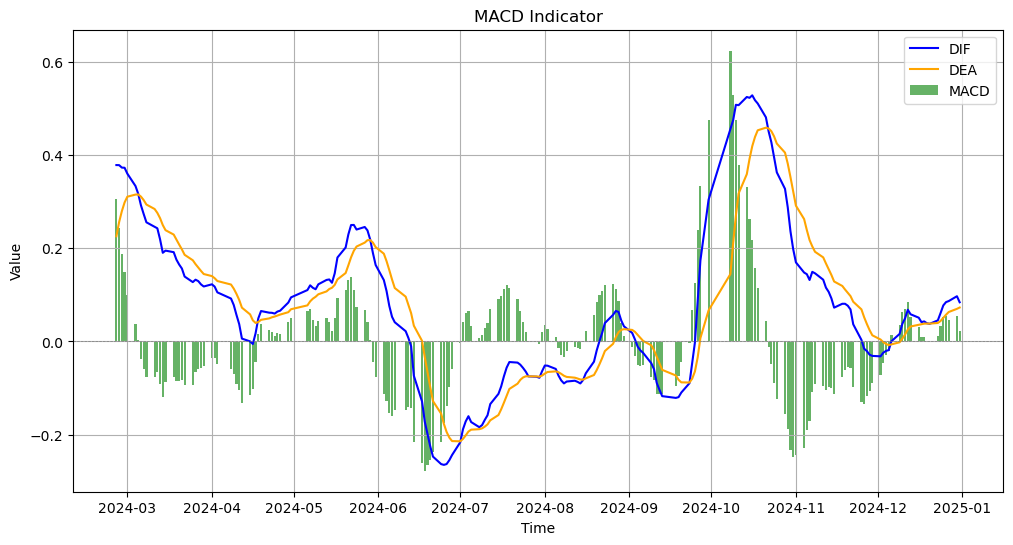

In [151]:

# 绘制 DIF、DEA 和 MACD  
plt.figure(figsize=(12, 6))  

# 绘制 DIF 和 DEA  
plt.plot(df['dif'], label='DIF', color='blue')  
plt.plot(df['dea'], label='DEA', color='orange')  

# 绘制 MACD 柱状图（使用 bar 格式）  
plt.bar(df.index, df['macd'], label='MACD', color='green', alpha=0.6)  

# 添加标题和标签  
plt.title('MACD Indicator')  
plt.xlabel('Time')  
plt.ylabel('Value')  
plt.axhline(0, color='gray', lw=0.5, ls='--')  # 添加零线  
plt.legend()  
plt.grid()  
plt.show()  

In [152]:
df['signal']=0
df.loc[(df.dif>df.dea) & (df.dif.shift(1)<=df.dea.shift(1)), 'signal']=1
df.loc[(df.dif<df.dea) & (df.dif.shift(1)>=df.dea.shift(1)), 'signal']=-1
df['position']=df['signal'].cumsum()
df

,ts_code,close,dif,dea,macd,signal,position
trade_date,,,,,,,
2024-01-02,000001.SZ,9.21,NaN,NaN,NaN,0,0
2024-01-03,000001.SZ,9.20,NaN,NaN,NaN,0,0
2024-01-04,000001.SZ,9.11,NaN,NaN,NaN,0,0
2024-01-05,000001.SZ,9.27,NaN,NaN,NaN,0,0
2024-01-08,000001.SZ,9.15,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
2024-12-25,000001.SZ,11.92,0.077163,0.050474,0.053378,0,0
2024-12-26,000001.SZ,11.86,0.084317,0.057242,0.054149,0,0
2024-12-27,000001.SZ,11.83,0.086568,0.063107,0.046921,0,0


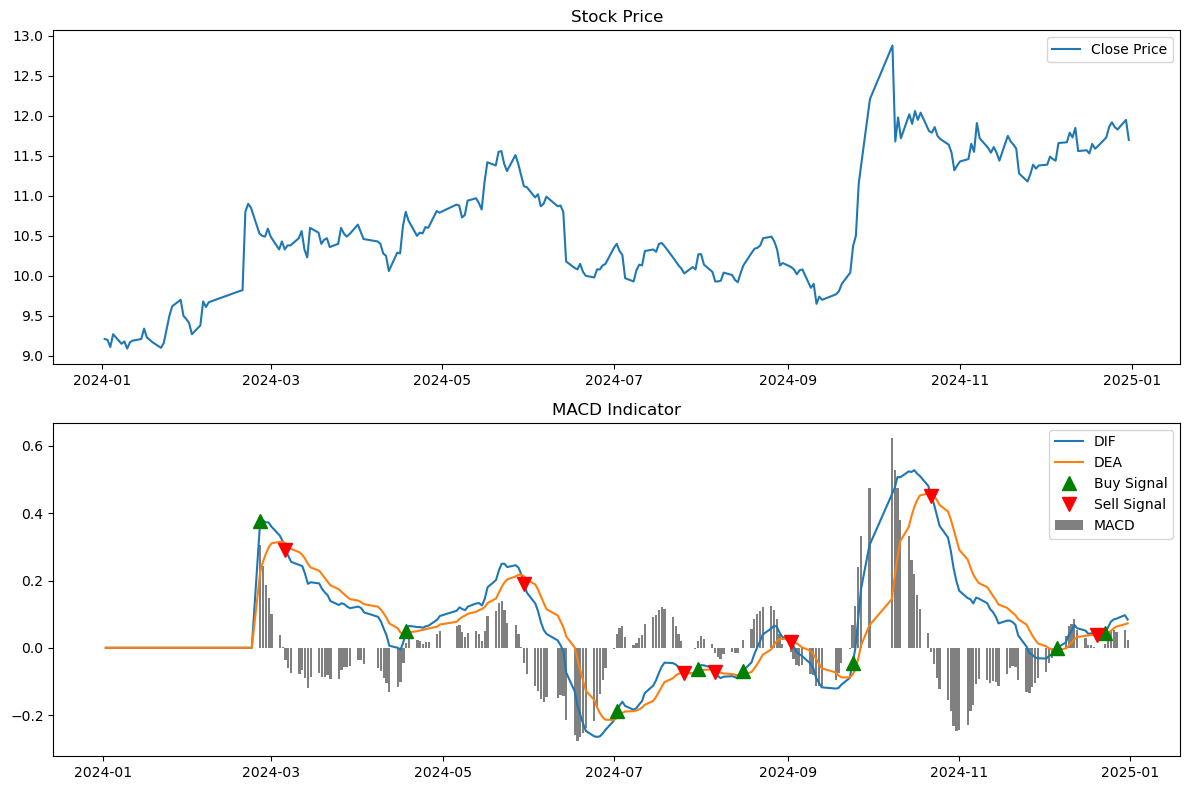

In [149]:
# 绘制图表
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
axes[0].plot(df['close'], label='Close Price')
axes[0].set_title('Stock Price')
axes[0].legend()

axes[1].plot(df['dif'], label='DIF')
axes[1].plot(df['dea'], label='DEA')
axes[1].bar(df.index, df['macd'], label='MACD', color='gray')
axes[1].plot(df[df['signal'] == 1].index, df['dif'][df['signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
axes[1].plot(df[df['signal'] == -1].index, df['dif'][df['signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
axes[1].set_title('MACD Indicator')
axes[1].legend()

plt.tight_layout()
plt.show()
    